<h1 style="color:#00FFFF;">Heart Risk Prediction</h1>


Heart disease is one of the primary reasons for health complications, and early detection is essential. This project uses machine learning to forecast heart attack risk from important medical parameters like blood pressure, cholesterol levels, age, and lifestyle factors.

With methods such as undersampling, SMOTE, ensemble learning, threshold tuning, and hyperparameter tuning, the model seeks to enhance precision and recall in high-risk patients. The final model, implemented through Streamlit, offers a user-friendly interface for risk evaluation.

In [3]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score

In [ ]:
df=pd.read_csv('heart_2022_with_nans .csv')

In [6]:
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ECigaretteUsage,AgeCategory,BMI,AlcoholDrinkers
0,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,No,No,No,...,No,No,No,No,Yes,Never smoked,Not at all (right now),Age 80 or older,NaN,No
1,Female,Excellent,0.0,0.0,NaN,No,6.0,No,No,No,...,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 80 or older,26.57,No
2,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,No,No,No,...,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 55 to 59,25.61,No
3,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,...,No,No,No,Yes,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,NaN,23.30,No
4,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,No,...,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 40 to 44,21.77,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    445132 non-null  object 
 1   GeneralHealth          443934 non-null  object 
 2   PhysicalHealthDays     434205 non-null  float64
 3   MentalHealthDays       436065 non-null  float64
 4   LastCheckupTime        436824 non-null  object 
 5   PhysicalActivities     444039 non-null  object 
 6   SleepHours             439679 non-null  float64
 7   HadHeartAttack         442067 non-null  object 
 8   HadAngina              440727 non-null  object 
 9   HadStroke              443575 non-null  object 
 10  HadAsthma              443359 non-null  object 
 11  HadSkinCancer          441989 non-null  object 
 12  HadCOPD                442913 non-null  object 
 13  HadDepressiveDisorder  442320 non-null  object 
 14  HadKidneyDisease       443206 non-nu

In [8]:
df.shape

(445132, 22)

In [9]:
df.columns

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'AgeCategory', 'BMI',
       'AlcoholDrinkers'],
      dtype='object')

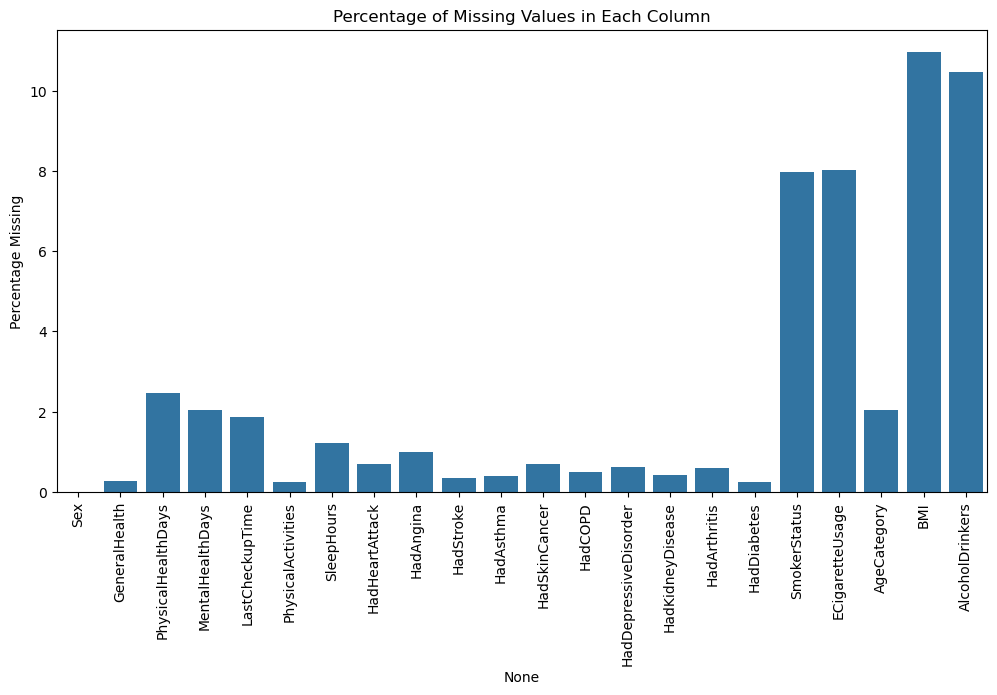

In [10]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values in Each Column')
plt.ylabel('Percentage Missing')
plt.show()

In [11]:
df = df.dropna( subset=['HadHeartAttack'] )
df.shape
df

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ECigaretteUsage,AgeCategory,BMI,AlcoholDrinkers
0,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,No,No,No,...,No,No,No,No,Yes,Never smoked,Not at all (right now),Age 80 or older,NaN,No
1,Female,Excellent,0.0,0.0,NaN,No,6.0,No,No,No,...,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 80 or older,26.57,No
2,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,No,No,No,...,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 55 to 59,25.61,No
3,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,...,No,No,No,Yes,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,NaN,23.30,No
4,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,No,...,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 40 to 44,21.77,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,No,No,No,...,No,Yes,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 18 to 24,25.63,NaN
445128,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,...,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 50 to 54,28.66,No
445129,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,No,No,No,...,No,No,No,No,No,Current smoker - now smokes every day,Use them some days,Age 65 to 69,17.23,NaN
445130,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,Yes,No,No,...,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 70 to 74,32.55,No


In [12]:
duplicate_rows = df[df.duplicated()]
print(f"Total duplicate rows: {len(duplicate_rows)}")


Total duplicate rows: 12521


In [13]:
duplicate_counts = {col: df[col].duplicated().sum() for col in df.columns}
print(duplicate_counts)


{'Sex': 442065, 'GeneralHealth': 442061, 'PhysicalHealthDays': 442035, 'MentalHealthDays': 442035, 'LastCheckupTime': 442062, 'PhysicalActivities': 442064, 'SleepHours': 442042, 'HadHeartAttack': 442065, 'HadAngina': 442064, 'HadStroke': 442064, 'HadAsthma': 442064, 'HadSkinCancer': 442064, 'HadCOPD': 442064, 'HadDepressiveDisorder': 442064, 'HadKidneyDisease': 442064, 'HadArthritis': 442064, 'HadDiabetes': 442062, 'SmokerStatus': 442062, 'ECigaretteUsage': 442062, 'AgeCategory': 442053, 'BMI': 438089, 'AlcoholDrinkers': 442064}


In [14]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: Sex
Sex
Female    234519
Male      207548
Name: count, dtype: int64

Column: GeneralHealth
GeneralHealth
Very good    147967
Good         142550
Excellent     71623
Fair          59528
Poor          19304
Name: count, dtype: int64

Column: PhysicalHealthDays
PhysicalHealthDays
0.0     266537
30.0     32608
2.0      25128
1.0      17156
3.0      15850
5.0      15211
10.0     10507
7.0       9275
15.0      8683
4.0       8421
20.0      5348
14.0      4992
6.0       2514
25.0      2144
8.0       1745
12.0      1094
21.0      1027
28.0       746
9.0        405
29.0       361
18.0       264
16.0       252
27.0       188
17.0       182
13.0       159
11.0       158
22.0       139
24.0       122
26.0       108
23.0        98
19.0        48
Name: count, dtype: int64

Column: MentalHealthDays
MentalHealthDays
0.0     263622
30.0     26670
2.0      23667
5.0      19853
10.0     15328
3.0      15257
15.0     14418
1.0      14320
20.0      9084
4.0       7900
7.0       7798
25.0      3048

In [15]:
df.describe(include='object')

,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ECigaretteUsage,AgeCategory,AlcoholDrinkers
count,442067,440972,434026,441095,442067,438479,440997,440630,439303,440229,439646,440453,439754,441254,407126,406924,433260,396130
unique,2,5,4,2,2,2,2,2,2,2,2,2,2,4,4,4,13,2
top,Female,Very good,Within past year (anytime less than 12 months ...,Yes,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 65 to 69,Yes
freq,234519,147967,348653,335778,416959,412331,422101,374481,404040,405062,348921,420394,289857,366668,244613,310133,46808,210023


In [16]:
for col in df.describe(include='object').columns:
    print('Column Name: ',col)
    print(df[col].unique())
    print('-------------------------------------------------')

Column Name:  Sex
['Female' 'Male']
-------------------------------------------------
Column Name:  GeneralHealth
['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
-------------------------------------------------
Column Name:  LastCheckupTime
['Within past year (anytime less than 12 months ago)' nan
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)'
 '5 or more years ago']
-------------------------------------------------
Column Name:  PhysicalActivities
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadHeartAttack
['No' 'Yes']
-------------------------------------------------
Column Name:  HadAngina
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadStroke
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadAsthma
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadSkinCancer
['No' 'Yes' n

In [17]:
df['HadDiabetes'] = df['HadDiabetes'].replace({
    'No, pre-diabetes or borderline diabetes': 'Borderline',
    'Yes, but only during pregnancy (female)': 'During Pregnancy'
})


df['HadDiabetes'].unique()

array(['Yes', 'No', 'Borderline', nan, 'During Pregnancy'], dtype=object)

In [18]:
df.HadDiabetes

0         Yes
1          No
2          No
3          No
4          No
         ... 
445127     No
445128     No
445129     No
445130     No
445131     No
Name: HadDiabetes, Length: 442067, dtype: object

In [19]:
df['SmokerStatus'] = df['SmokerStatus'].replace({
    'Current smoker - now smokes some days': 'Current smoker (Some days)',
    'Current smoker - now smokes every day': 'Current smoker (Every day)'
})

df['SmokerStatus'].unique()  # Check unique values


array(['Never smoked', 'Current smoker (Some days)', 'Former smoker', nan,
       'Current smoker (Every day)'], dtype=object)

In [20]:
df['ECigaretteUsage'] = df['ECigaretteUsage'].replace({
    'Not at all (right now)': 'Not at all',
    'Never used e-cigarettes in my entire life': 'Never',
    'Use them every day': 'Everyday',
    'Use them some days': 'Somedays'
})

df['ECigaretteUsage'].unique()  # Check unique values


array(['Not at all', 'Never', nan, 'Everyday', 'Somedays'], dtype=object)

In [21]:
df

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ECigaretteUsage,AgeCategory,BMI,AlcoholDrinkers
0,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,No,No,No,...,No,No,No,No,Yes,Never smoked,Not at all,Age 80 or older,NaN,No
1,Female,Excellent,0.0,0.0,NaN,No,6.0,No,No,No,...,No,No,No,No,No,Never smoked,Never,Age 80 or older,26.57,No
2,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,No,No,No,...,No,No,No,No,No,Never smoked,Never,Age 55 to 59,25.61,No
3,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,...,No,No,No,Yes,No,Current smoker (Some days),Never,NaN,23.30,No
4,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,No,...,No,No,No,No,No,Never smoked,Never,Age 40 to 44,21.77,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,No,No,No,...,No,Yes,No,No,No,Never smoked,Never,Age 18 to 24,25.63,NaN
445128,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,...,No,No,No,No,No,Never smoked,Never,Age 50 to 54,28.66,No
445129,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,No,No,No,...,No,No,No,No,No,Current smoker (Every day),Somedays,Age 65 to 69,17.23,NaN
445130,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,Yes,No,No,...,No,No,No,No,No,Never smoked,Never,Age 70 to 74,32.55,No


In [22]:
df['AgeCategory'] = df['AgeCategory'].astype(str)  # Convert NaNs to strings
df['AgeCategory'] = (df['AgeCategory']
                     .str.replace("Age ", "")
                     .str.replace(" or older", "+")
                     .str.replace(" to ", "-")
                     .str.strip())  # Remove spaces


In [23]:
df.AgeCategory.unique()

array(['80+', '55-59', 'nan', '40-44', '75-79', '70-74', '65-69', '60-64',
       '50-54', '45-49', '35-39', '25-29', '30-34', '18-24'], dtype=object)

In [24]:
def age_group(age):
    young = ['18-24', '25-29', '30-34', '35-39']
    middle_aged = ['40-44', '45-49', '50-54', '55-59']
    old = ['60-64', '65-69', '70-74', '75-79', '80+']

    if age in young:
        return "Young"
    elif age in middle_aged:
        return "Middle-aged"
    elif age in old:
        return "Old"
    else:
        return "Unknown"  # Handles NaN or unexpected values

In [25]:
df['AgeCategory'] = df['AgeCategory'].apply(age_group)

# 4. Verify the unique values
print(df['AgeCategory'].unique())


['Old' 'Middle-aged' 'Unknown' 'Young']


In [26]:
df.describe(include='object')

,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ECigaretteUsage,AgeCategory,AlcoholDrinkers
count,442067,440972,434026,441095,442067,438479,440997,440630,439303,440229,439646,440453,439754,441254,407126,406924,442067,396130
unique,2,5,4,2,2,2,2,2,2,2,2,2,2,4,4,4,4,2
top,Female,Very good,Within past year (anytime less than 12 months ...,Yes,No,No,No,No,No,No,No,No,No,No,Never smoked,Never,Old,Yes
freq,234519,147967,348653,335778,416959,412331,422101,374481,404040,405062,348921,420394,289857,366668,244613,310133,202195,210023


In [27]:
df[df.duplicated()]

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ECigaretteUsage,AgeCategory,BMI,AlcoholDrinkers
2789,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,No,No,No,...,No,No,No,Yes,Yes,Never smoked,Never,Old,NaN,No
3150,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,No,No,No,...,No,No,No,Yes,No,Never smoked,Never,Old,25.09,No
4825,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,...,No,No,No,Yes,No,NaN,NaN,Middle-aged,NaN,NaN
4987,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,No,No,No,...,No,No,No,Yes,No,NaN,NaN,Old,NaN,NaN
5197,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,...,No,No,No,No,No,Never smoked,Never,Unknown,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445092,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,No,No,No,...,No,No,No,No,No,Never smoked,Never,Young,29.53,Yes
445096,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,...,No,No,No,No,No,Never smoked,Never,Middle-aged,24.96,Yes
445105,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,No,No,No,...,No,No,No,Yes,No,Never smoked,Never,Old,29.84,Yes
445114,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,...,No,No,No,No,No,Never smoked,Never,Middle-aged,28.29,Yes


In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.describe()


,PhysicalHealthDays,MentalHealthDays,SleepHours,BMI
count,406143.000000,407928.000000,411582.000000,380346.000000
mean,4.582482,4.629033,7.008715,28.605536
std,8.854107,8.553016,1.527038,6.622191
min,0.000000,0.000000,1.000000,12.020000
25%,0.000000,0.000000,6.000000,24.130000
50%,0.000000,0.000000,7.000000,27.440000
75%,4.000000,5.000000,8.000000,31.890000
max,30.000000,30.000000,24.000000,99.640000



# **Visualizations (histplot(), distplot(), countplot(), barplot())**


---



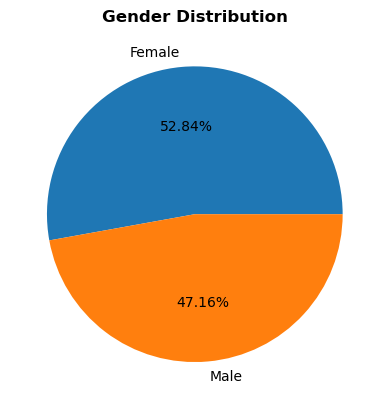

In [31]:
gender_count = df['Sex'].value_counts()
plt.title("Gender Distribution", fontsize = 12, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%')
plt.show()

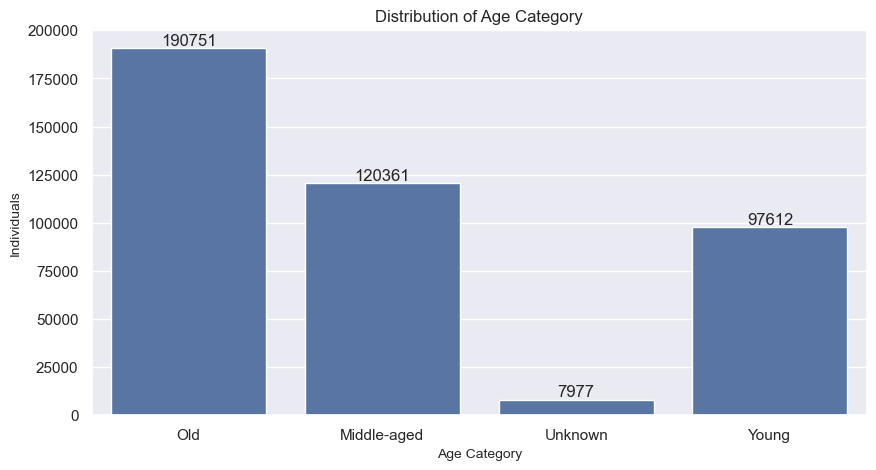

In [32]:
plt.figure(figsize=(10, 5))
sns.set(style='darkgrid')
x = sns.countplot(data=df, x='AgeCategory')
plt.title("Distribution of Age Category", fontsize=12)
plt.xlabel("Age Category", fontsize=10)
plt.ylabel("Individuals", fontsize=10)
for c in x.containers:
    x.bar_label(c)

plt.show()


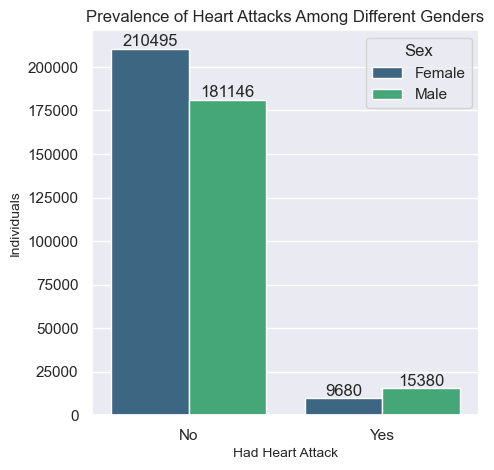

In [33]:
plt.figure(figsize=(5, 5))
sns.set(style='darkgrid')
x = sns.countplot(data=df, x='HadHeartAttack', hue='Sex', palette='viridis')
plt.title("Prevalence of Heart Attacks Among Different Genders", fontsize=12)
plt.xlabel("Had Heart Attack", fontsize=10)
plt.ylabel("Individuals", fontsize=10)
for c in x.containers:
    x.bar_label(c)

plt.show()

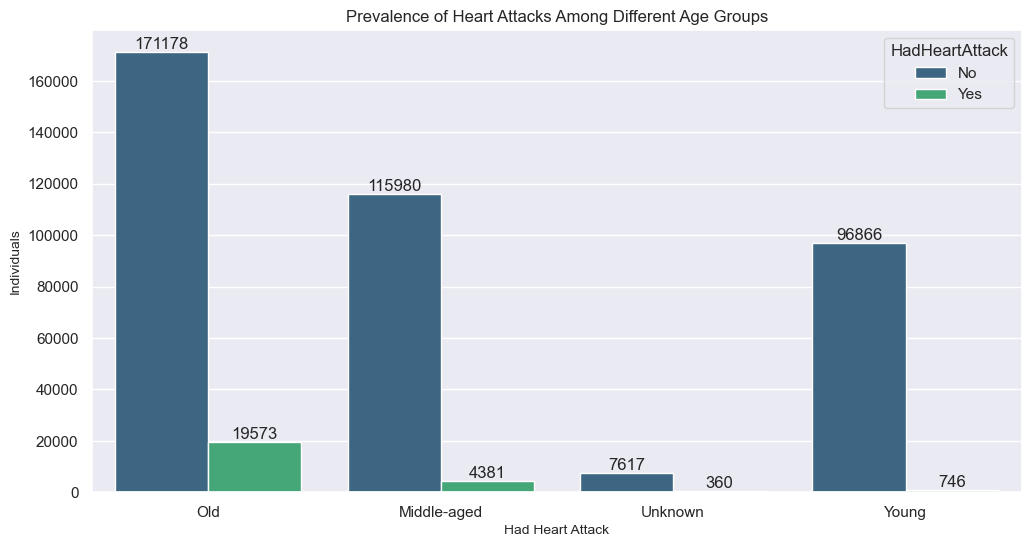

In [34]:
plt.figure(figsize=(12, 6))
sns.set(style='darkgrid')
x = sns.countplot(data=df, x='AgeCategory', hue='HadHeartAttack', palette='viridis')
plt.title("Prevalence of Heart Attacks Among Different Age Groups", fontsize=12)
plt.xlabel("Had Heart Attack", fontsize=10)
plt.ylabel("Individuals", fontsize=10)
for c in x.containers:
    x.bar_label(c)

plt.show()

In [35]:
df['HadObesity'] = df['BMI'].apply(lambda x: 'Yes' if x >=30 else 'No')

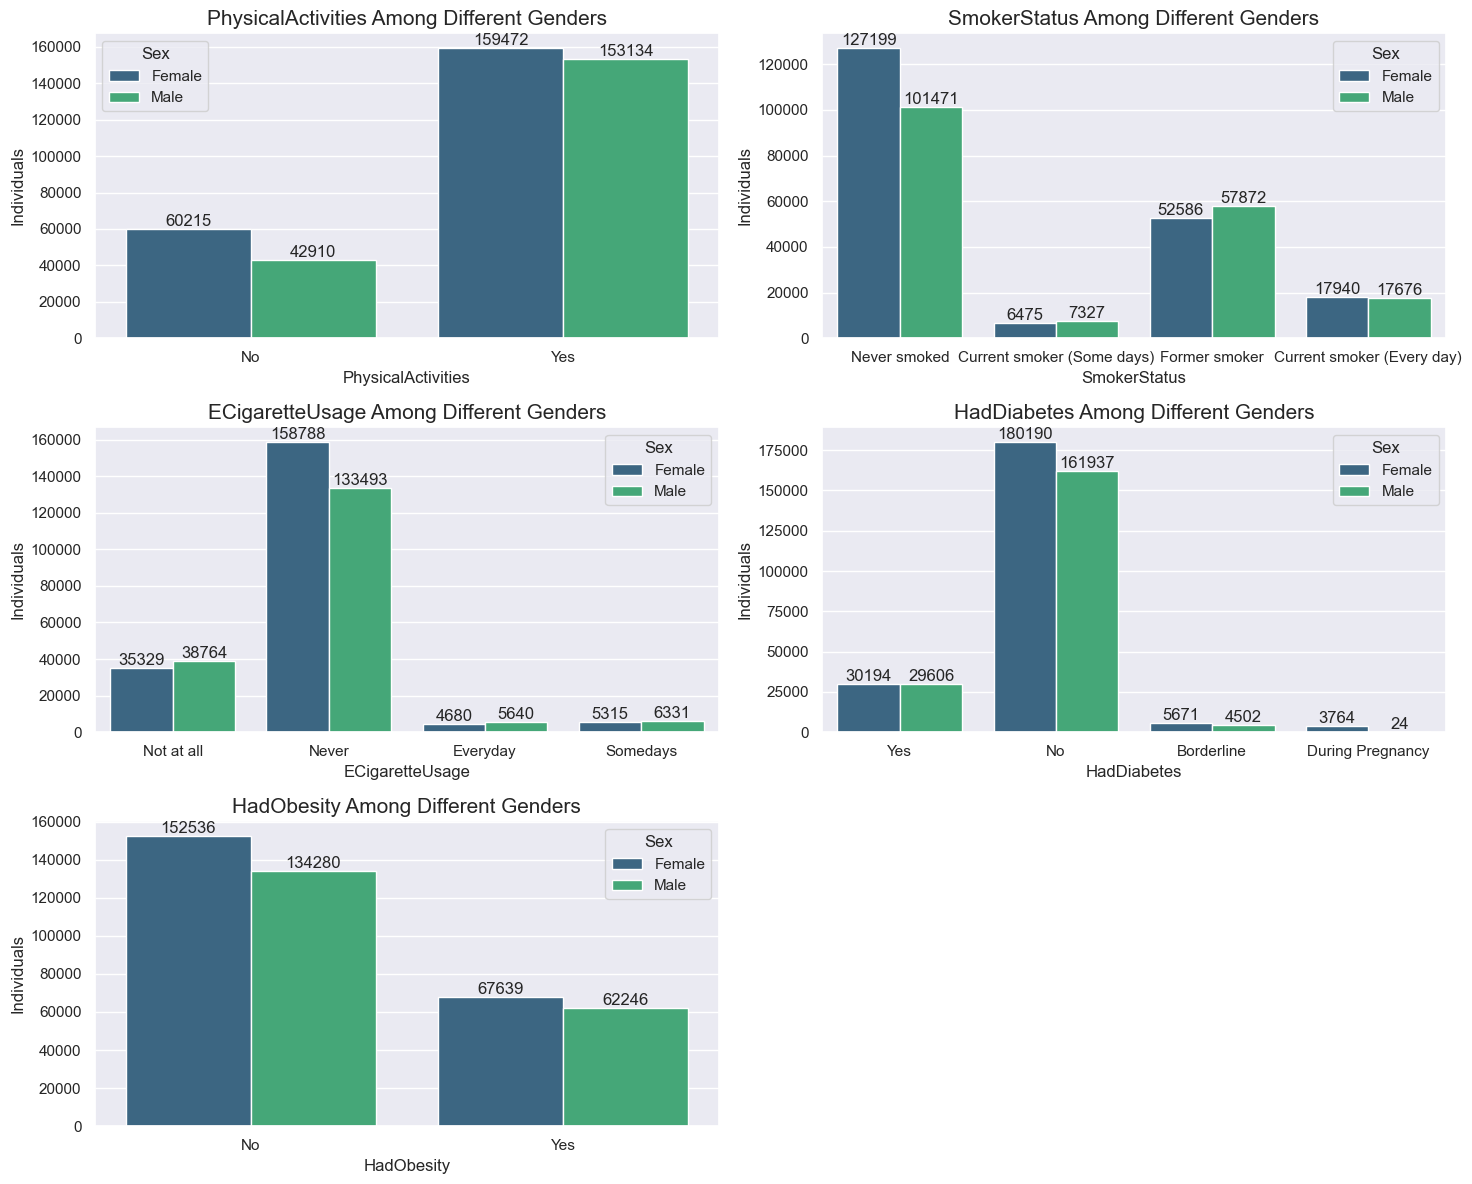

In [36]:
plt.figure(figsize=(15, 12))
sns.set(style='darkgrid')
risk_factors = ['PhysicalActivities', 'SmokerStatus', 'ECigaretteUsage', 'HadDiabetes', 'HadObesity']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(3, 2, i)
    x = sns.countplot(data=df, x=risk_factor, hue='Sex', palette='viridis')
    plt.title(f"{risk_factor} Among Different Genders", fontsize=15)
    plt.xlabel(risk_factor, fontsize=12)
    plt.ylabel("Individuals", fontsize=12)
    for c in x.containers:
        x.bar_label(c)
plt.tight_layout()
plt.show()

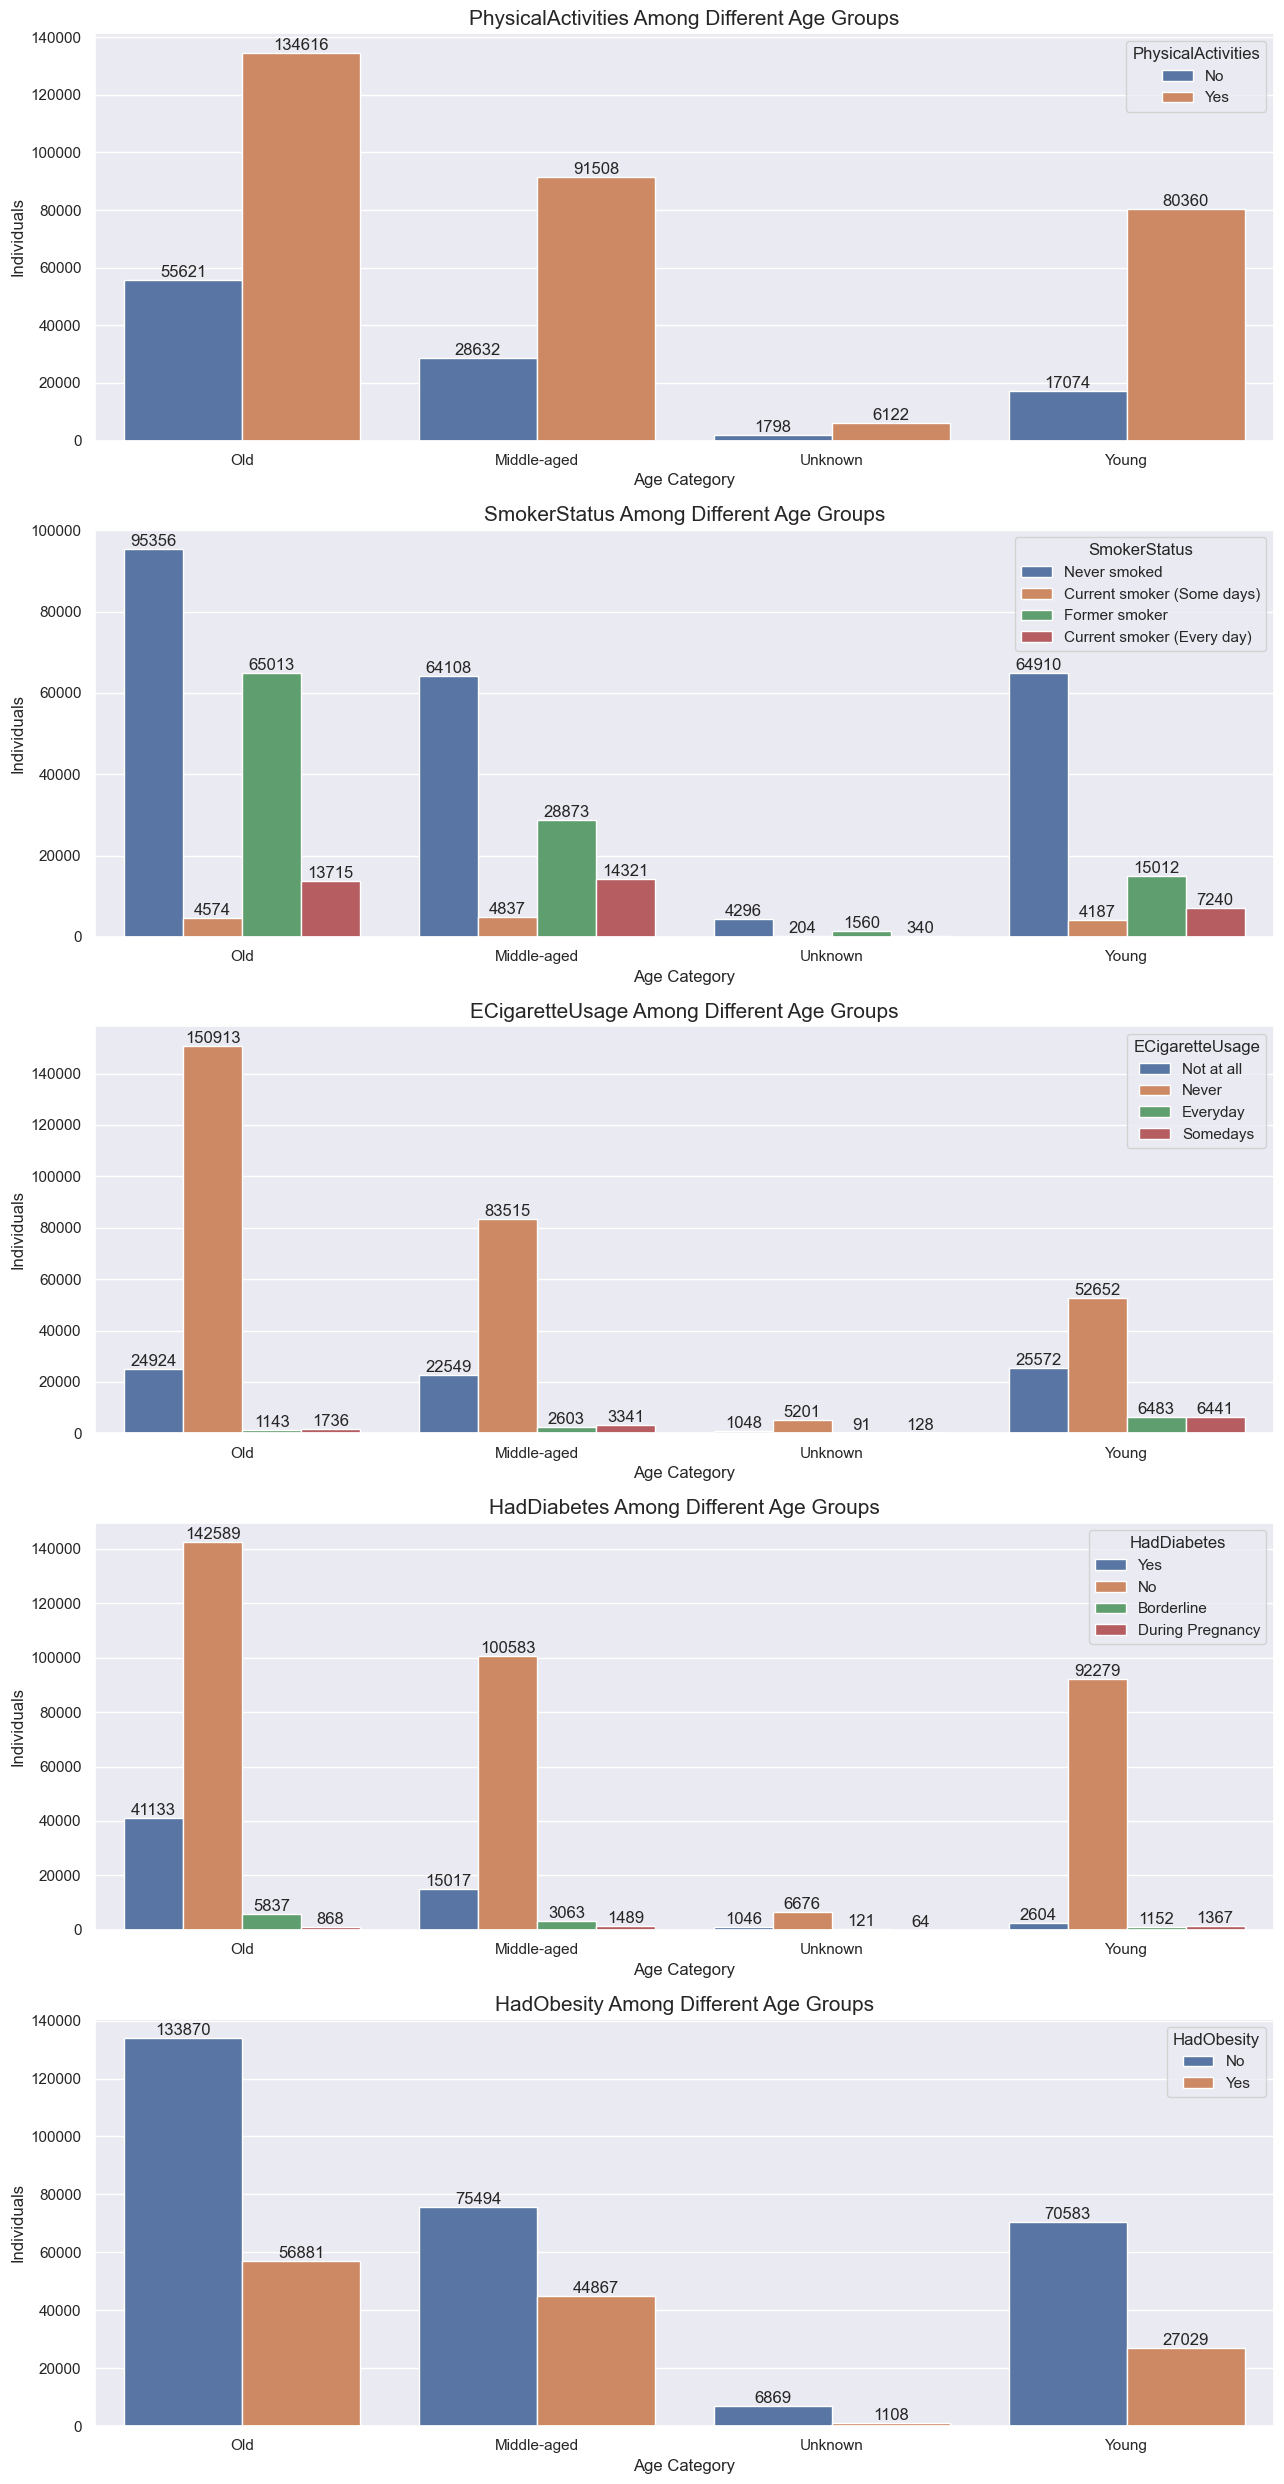

In [37]:
plt.figure(figsize=(13, 25))
sns.set(style='darkgrid')
risk_factors = ['PhysicalActivities', 'SmokerStatus', 'ECigaretteUsage', 'HadDiabetes', 'HadObesity']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(5, 1, i)
    x = sns.countplot(data=df, x='AgeCategory', hue=risk_factor)
    plt.title(f"{risk_factor} Among Different Age Groups", fontsize=15)
    plt.xlabel("Age Category", fontsize=12)
    plt.ylabel("Individuals", fontsize=12)
    for c in x.containers:
        x.bar_label(c)
plt.tight_layout()
plt.show()


# **Handle outliers (IQR method, Z-score, boxplot())**

---



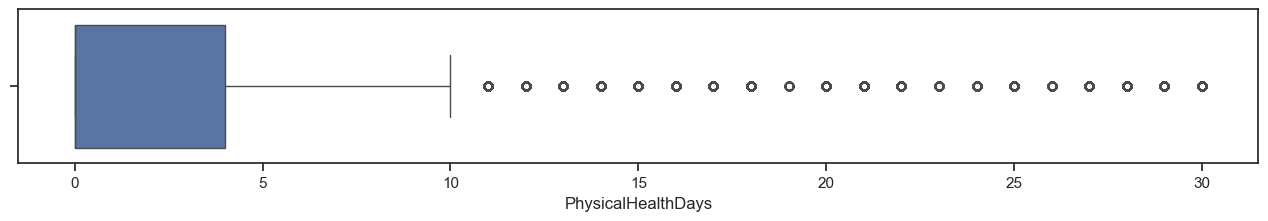

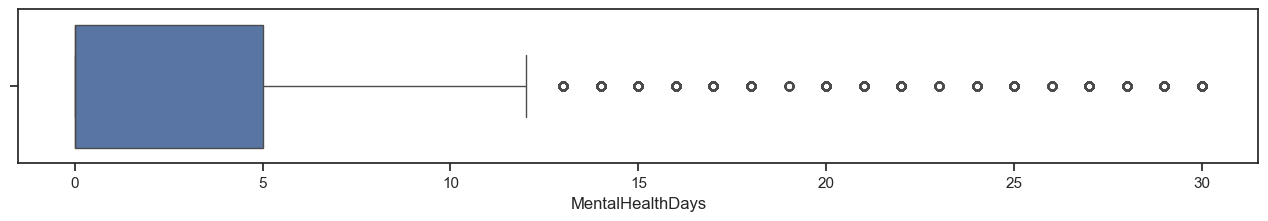

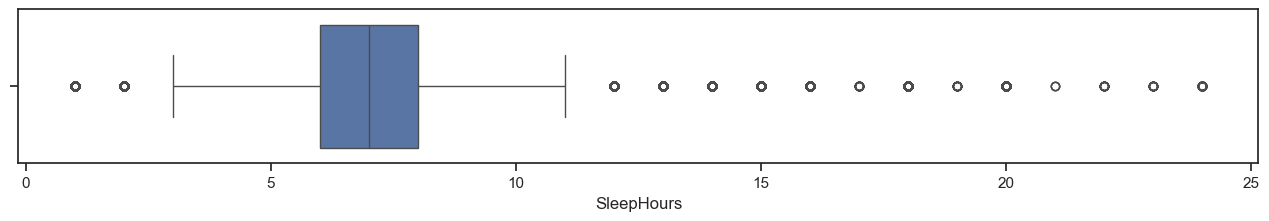

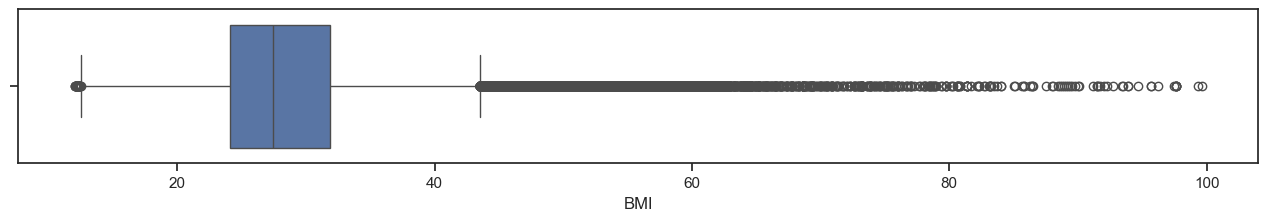

In [39]:
for col in df.describe().columns:
    sns.set_style('ticks')
    plt.figure(figsize=(16, 2))
    sns.boxplot(data=df, x=col)
    plt.show()

In [40]:
#Function for extracting outliers in column of dataframe
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1

    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)

    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    return outliers, lower_limit, upper_limit

In [41]:
sleep_hours_outliers, lower_sleep, upper_sleep = get_outliers(df, 'SleepHours')
sleep_hours_outliers

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ECigaretteUsage,AgeCategory,BMI,AlcoholDrinkers,HadObesity
88,Female,Excellent,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,No,1.0,No,No,No,...,No,No,No,No,Never smoked,Never,Old,21.26,No,No
95,Male,Poor,NaN,0.0,Within past year (anytime less than 12 months ...,Yes,12.0,No,No,No,...,Yes,No,Yes,No,Former smoker,Never,Old,31.87,Yes,Yes
118,Female,Poor,30.0,30.0,Within past year (anytime less than 12 months ...,No,18.0,Yes,Yes,Yes,...,No,Yes,Yes,Yes,Never smoked,Never,Old,21.01,No,No
127,Male,Very good,0.0,2.0,Within past year (anytime less than 12 months ...,Yes,12.0,No,No,No,...,No,No,No,No,Never smoked,Never,Old,17.03,No,No
208,Female,Poor,25.0,0.0,Within past year (anytime less than 12 months ...,Yes,12.0,No,No,No,...,Yes,No,Yes,Borderline,Former smoker,Never,Old,51.49,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444948,Female,Fair,2.0,1.0,Within past year (anytime less than 12 months ...,Yes,18.0,No,No,No,...,No,No,Yes,No,Never smoked,Never,Old,36.61,Yes,Yes
445066,Male,Very good,NaN,0.0,Within past year (anytime less than 12 months ...,Yes,20.0,No,No,No,...,No,No,No,No,Never smoked,Never,Old,26.50,No,No
445103,Female,Good,10.0,0.0,Within past year (anytime less than 12 months ...,No,12.0,Yes,No,No,...,No,No,Yes,Yes,NaN,NaN,Old,NaN,NaN,No
445108,Female,Good,5.0,NaN,Within past year (anytime less than 12 months ...,Yes,18.0,No,No,No,...,No,No,Yes,No,Never smoked,Never,Old,24.56,No,No


In [42]:
print(f"Lower Limit:{lower_sleep})\nUpper Limit:{upper_sleep})")

Lower Limit:3.0)
Upper Limit:11.0)


In [43]:
# Dropping records with sleep less than 3 hours
df = df.drop(df[df['SleepHours'] < 3].index)
df.reset_index(drop=True, inplace=True)
df.shape

(414079, 23)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414079 entries, 0 to 414078
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    414079 non-null  object 
 1   GeneralHealth          412994 non-null  object 
 2   PhysicalHealthDays     403598 non-null  float64
 3   MentalHealthDays       405391 non-null  float64
 4   LastCheckupTime        406319 non-null  object 
 5   PhysicalActivities     413120 non-null  object 
 6   SleepHours             408960 non-null  float64
 7   HadHeartAttack         414079 non-null  object 
 8   HadAngina              410533 non-null  object 
 9   HadStroke              413024 non-null  object 
 10  HadAsthma              412655 non-null  object 
 11  HadSkinCancer          411335 non-null  object 
 12  HadCOPD                412265 non-null  object 
 13  HadDepressiveDisorder  411697 non-null  object 
 14  HadKidneyDisease       412483 non-nu

In [45]:
df.drop(columns=['LastCheckupTime'], inplace=True)


In [46]:
columns_to_drop_na = ['GeneralHealth','PhysicalActivities','HadAngina','HadStroke','HadAsthma','HadSkinCancer',
  'HadCOPD','HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes','AgeCategory',
  'MentalHealthDays','PhysicalHealthDays','SleepHours']

df.dropna(subset=columns_to_drop_na, inplace=True)
df.isna().sum()/len(df)*100


Sex                      0.000000
GeneralHealth            0.000000
PhysicalHealthDays       0.000000
MentalHealthDays         0.000000
PhysicalActivities       0.000000
SleepHours               0.000000
HadHeartAttack           0.000000
HadAngina                0.000000
HadStroke                0.000000
HadAsthma                0.000000
HadSkinCancer            0.000000
HadCOPD                  0.000000
HadDepressiveDisorder    0.000000
HadKidneyDisease         0.000000
HadArthritis             0.000000
HadDiabetes              0.000000
SmokerStatus             6.382715
ECigaretteUsage          6.428882
AgeCategory              0.000000
BMI                      8.057406
AlcoholDrinkers          8.893169
HadObesity               0.000000
dtype: float64

In [47]:
columns_with_nulls = df.columns[df.isnull().any()]
columns_with_nulls

Index(['SmokerStatus', 'ECigaretteUsage', 'BMI', 'AlcoholDrinkers'], dtype='object')

In [48]:
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ECigaretteUsage,AgeCategory,BMI,AlcoholDrinkers,HadObesity
0,Female,Very good,0.0,0.0,No,8.0,No,No,No,No,...,No,No,No,Yes,Never smoked,Not at all,Old,NaN,No,No
1,Female,Excellent,0.0,0.0,No,6.0,No,No,No,No,...,No,No,No,No,Never smoked,Never,Old,26.57,No,No
2,Female,Very good,2.0,3.0,Yes,5.0,No,No,No,No,...,No,No,No,No,Never smoked,Never,Middle-aged,25.61,No,No
3,Female,Excellent,0.0,0.0,Yes,7.0,No,No,No,Yes,...,No,No,Yes,No,Current smoker (Some days),Never,Unknown,23.30,No,No
4,Female,Fair,2.0,0.0,Yes,9.0,No,No,No,No,...,No,No,No,No,Never smoked,Never,Middle-aged,21.77,Yes,No


In [49]:
columns_to_check = ['SmokerStatus', 'ECigaretteUsage', 'BMI', 'AlcoholDrinkers']

# Display unique values for each column
for col in columns_to_check:
    if col in df.columns:
        print(f"Unique values in {col}: {df[col].unique()}\n")

Unique values in SmokerStatus: ['Never smoked' 'Current smoker (Some days)' 'Former smoker' nan
 'Current smoker (Every day)']

Unique values in ECigaretteUsage: ['Not at all' 'Never' nan 'Everyday' 'Somedays']

Unique values in BMI: [  nan 26.57 25.61 ... 28.39 48.63 17.35]

Unique values in AlcoholDrinkers: ['No' 'Yes' nan]



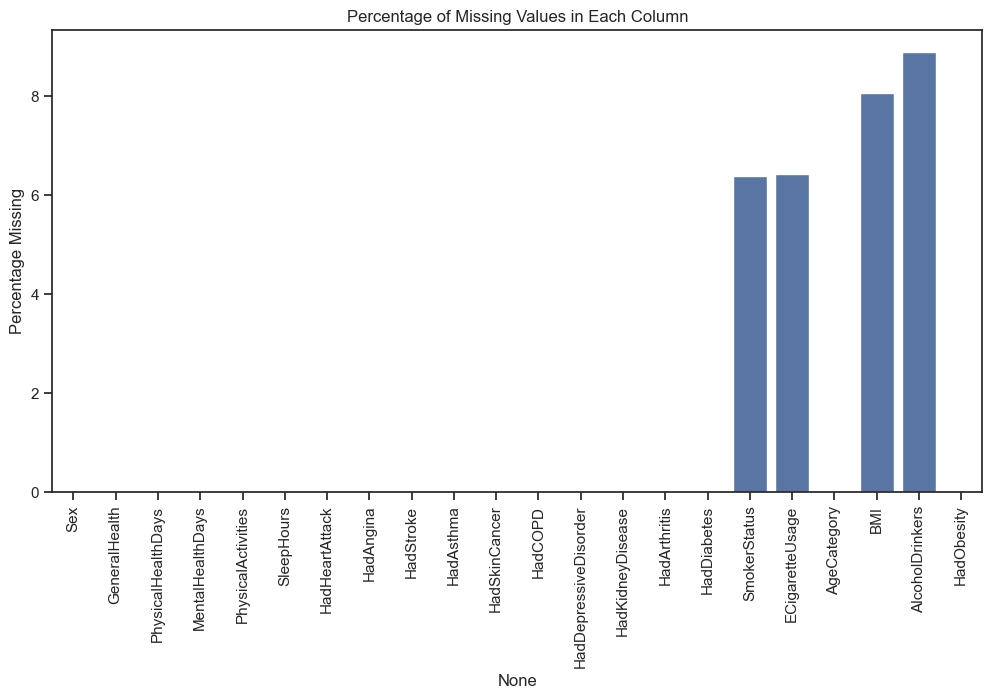

In [50]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values in Each Column')
plt.ylabel('Percentage Missing')
plt.show()

In [51]:
print(df.isna().sum())  # Should print 0 for all columns

Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
PhysicalActivities           0
SleepHours                   0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
SmokerStatus             24194
ECigaretteUsage          24369
AgeCategory                  0
BMI                      30542
AlcoholDrinkers          33710
HadObesity                   0
dtype: int64


In [52]:
columns_to_fill = ['SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers']
df[columns_to_fill] = df[columns_to_fill].fillna("Unknown")


In [53]:
print(df.groupby('HadHeartAttack')[['BMI']].mean())


                      BMI
HadHeartAttack           
No              28.553842
Yes             29.341068


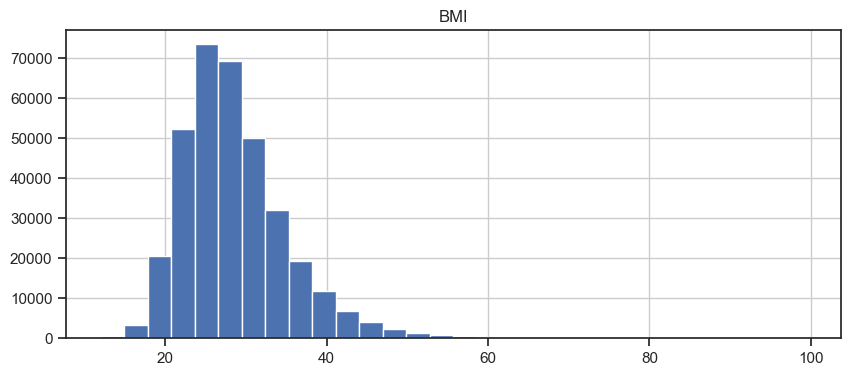

In [54]:
import matplotlib.pyplot as plt

# Plot histograms
df[[ 'BMI']].hist(bins=30, figsize=(10, 4))

plt.show()


In [55]:
print(df[[ 'BMI']].skew())


BMI    1.342197
dtype: float64


In [56]:
df['BMI'] = np.log1p(df['BMI'])  # Log transformation


In [57]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
print(outliers)


           Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
49      Female          Good                 0.0               0.0   
141     Female          Fair                30.0              20.0   
207     Female          Poor                25.0               0.0   
477     Female          Good                 0.0               0.0   
493       Male          Good                 0.0              30.0   
...        ...           ...                 ...               ...   
413843  Female          Good                30.0               0.0   
413858  Female     Very good                 8.0               4.0   
413876  Female          Good                 0.0               0.0   
413952    Male          Good                 5.0               0.0   
413977    Male     Very good                 0.0              15.0   

       PhysicalActivities  SleepHours HadHeartAttack HadAngina HadStroke  \
49                    Yes         7.0             No       Yes       Yes   
141    

In [58]:
df['BMI'] = np.clip(df['BMI'], lower_bound, upper_bound)


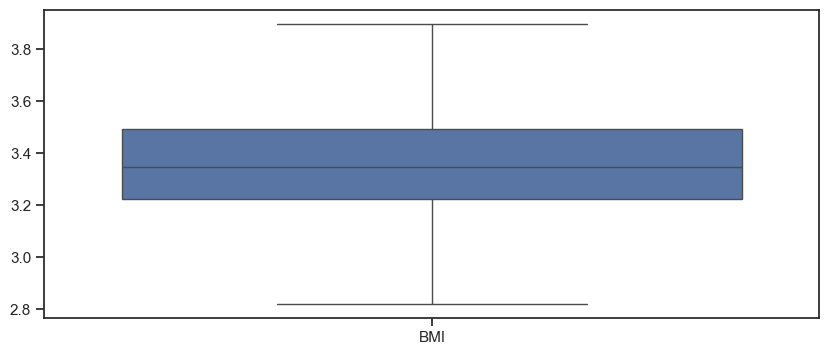

In [59]:
import seaborn as sns

# Plot boxplots
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[[ 'BMI']])
plt.show()


In [60]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())


In [61]:
print(df.isna().sum())  # Should print 0 for all columns

Sex                      0
GeneralHealth            0
PhysicalHealthDays       0
MentalHealthDays         0
PhysicalActivities       0
SleepHours               0
HadHeartAttack           0
HadAngina                0
HadStroke                0
HadAsthma                0
HadSkinCancer            0
HadCOPD                  0
HadDepressiveDisorder    0
HadKidneyDisease         0
HadArthritis             0
HadDiabetes              0
SmokerStatus             0
ECigaretteUsage          0
AgeCategory              0
BMI                      0
AlcoholDrinkers          0
HadObesity               0
dtype: int64



# **Feature correlation analysis (heatmap())**


---



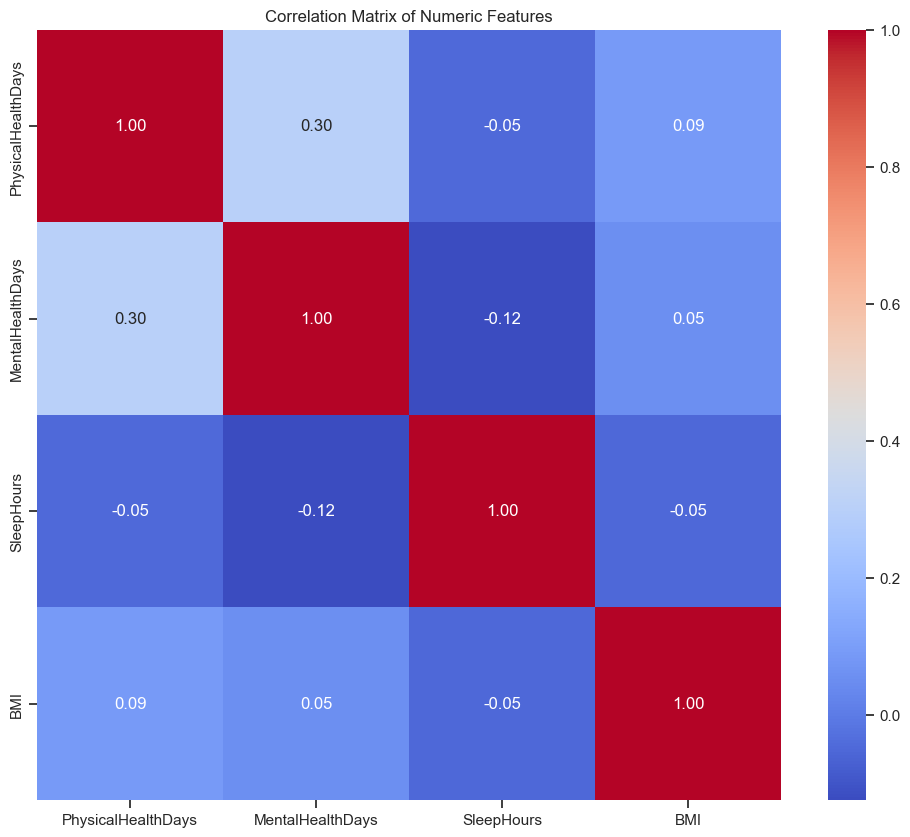

In [63]:



# Filter for numeric columns (int and float)
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [64]:

for col in df.describe(include='object').columns:
    print('Column Name: ',col)
    print(df[col].unique())
    print('-------------------------------------------------')


Column Name:  Sex
['Female' 'Male']
-------------------------------------------------
Column Name:  GeneralHealth
['Very good' 'Excellent' 'Fair' 'Poor' 'Good']
-------------------------------------------------
Column Name:  PhysicalActivities
['No' 'Yes']
-------------------------------------------------
Column Name:  HadHeartAttack
['No' 'Yes']
-------------------------------------------------
Column Name:  HadAngina
['No' 'Yes']
-------------------------------------------------
Column Name:  HadStroke
['No' 'Yes']
-------------------------------------------------
Column Name:  HadAsthma
['No' 'Yes']
-------------------------------------------------
Column Name:  HadSkinCancer
['No' 'Yes']
-------------------------------------------------
Column Name:  HadCOPD
['No' 'Yes']
-------------------------------------------------
Column Name:  HadDepressiveDisorder
['No' 'Yes']
-------------------------------------------------
Column Name:  HadKidneyDisease
['No' 'Yes']
---------------------

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379055 entries, 0 to 414078
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    379055 non-null  object 
 1   GeneralHealth          379055 non-null  object 
 2   PhysicalHealthDays     379055 non-null  float64
 3   MentalHealthDays       379055 non-null  float64
 4   PhysicalActivities     379055 non-null  object 
 5   SleepHours             379055 non-null  float64
 6   HadHeartAttack         379055 non-null  object 
 7   HadAngina              379055 non-null  object 
 8   HadStroke              379055 non-null  object 
 9   HadAsthma              379055 non-null  object 
 10  HadSkinCancer          379055 non-null  object 
 11  HadCOPD                379055 non-null  object 
 12  HadDepressiveDisorder  379055 non-null  object 
 13  HadKidneyDisease       379055 non-null  object 
 14  HadArthritis           379055 non-null  o

# **Feature engineering (One-hot encoding, Label encoding)**


---



In [67]:

from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoders for binary categorical columns
sex_label = LabelEncoder()
physical_activities_label = LabelEncoder()
had_heart_attack_label = LabelEncoder()
had_angina_label = LabelEncoder()
had_stroke_label = LabelEncoder()
had_asthma_label = LabelEncoder()
had_skin_cancer_label = LabelEncoder()
had_copd_label = LabelEncoder()
had_depressive_disorder_label = LabelEncoder()
had_kidney_disease_label = LabelEncoder()
had_arthritis_label = LabelEncoder()
had_obesity_label = LabelEncoder()

# Fit the encoders
sex_label.fit(df["Sex"])
physical_activities_label.fit(df["PhysicalActivities"].astype(str))
had_heart_attack_label.fit(df["HadHeartAttack"].astype(str))
had_angina_label.fit(df["HadAngina"].astype(str))
had_stroke_label.fit(df["HadStroke"].astype(str))
had_asthma_label.fit(df["HadAsthma"].astype(str))
had_skin_cancer_label.fit(df["HadSkinCancer"].astype(str))
had_copd_label.fit(df["HadCOPD"].astype(str))
had_depressive_disorder_label.fit(df["HadDepressiveDisorder"].astype(str))
had_kidney_disease_label.fit(df["HadKidneyDisease"].astype(str))
had_arthritis_label.fit(df["HadArthritis"].astype(str))
had_obesity_label.fit(df["HadObesity"].astype(str))

# Transform the data
df["Sex"] = sex_label.transform(df["Sex"])
df["PhysicalActivities"] = physical_activities_label.transform(df["PhysicalActivities"].astype(str))
df["HadHeartAttack"] = had_heart_attack_label.transform(df["HadHeartAttack"].astype(str))
df["HadAngina"] = had_angina_label.transform(df["HadAngina"].astype(str))
df["HadStroke"] = had_stroke_label.transform(df["HadStroke"].astype(str))
df["HadAsthma"] = had_asthma_label.transform(df["HadAsthma"].astype(str))
df["HadSkinCancer"] = had_skin_cancer_label.transform(df["HadSkinCancer"].astype(str))
df["HadCOPD"] = had_copd_label.transform(df["HadCOPD"].astype(str))
df["HadDepressiveDisorder"] = had_depressive_disorder_label.transform(df["HadDepressiveDisorder"].astype(str))
df["HadKidneyDisease"] = had_kidney_disease_label.transform(df["HadKidneyDisease"].astype(str))
df["HadArthritis"] = had_arthritis_label.transform(df["HadArthritis"].astype(str))
df["HadObesity"] = had_obesity_label.transform(df["HadObesity"].astype(str))



# Display sample data
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ECigaretteUsage,AgeCategory,BMI,AlcoholDrinkers,HadObesity
0,0,Very good,0.0,0.0,0,8.0,0,0,0,0,...,0,0,0,Yes,Never smoked,Not at all,Old,3.347797,No,0
1,0,Excellent,0.0,0.0,0,6.0,0,0,0,0,...,0,0,0,No,Never smoked,Never,Old,3.316728,No,0
2,0,Very good,2.0,3.0,1,5.0,0,0,0,0,...,0,0,0,No,Never smoked,Never,Middle-aged,3.281287,No,0
3,0,Excellent,0.0,0.0,1,7.0,0,0,0,1,...,0,0,1,No,Current smoker (Some days),Never,Unknown,3.190476,No,0
4,0,Fair,2.0,0.0,1,9.0,0,0,0,0,...,0,0,0,No,Never smoked,Never,Middle-aged,3.125444,Yes,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379055 entries, 0 to 414078
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    379055 non-null  int32  
 1   GeneralHealth          379055 non-null  object 
 2   PhysicalHealthDays     379055 non-null  float64
 3   MentalHealthDays       379055 non-null  float64
 4   PhysicalActivities     379055 non-null  int32  
 5   SleepHours             379055 non-null  float64
 6   HadHeartAttack         379055 non-null  int32  
 7   HadAngina              379055 non-null  int32  
 8   HadStroke              379055 non-null  int32  
 9   HadAsthma              379055 non-null  int32  
 10  HadSkinCancer          379055 non-null  int32  
 11  HadCOPD                379055 non-null  int32  
 12  HadDepressiveDisorder  379055 non-null  int32  
 13  HadKidneyDisease       379055 non-null  int32  
 14  HadArthritis           379055 non-null  i

In [69]:
from sklearn.preprocessing import OneHotEncoder




# Initialize OneHotEncoders for multi-category categorical features
general_health_ohe = OneHotEncoder(sparse_output=False, drop="first")
had_diabetes_ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
smoker_status_ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
e_cigarette_usage_ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
age_category_ohe = OneHotEncoder(sparse_output=False, drop="first")
alcohol_drinkers_ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Apply OneHotEncoding to each feature
general_health_encoded = general_health_ohe.fit_transform(df[["GeneralHealth"]])
had_diabetes_encoded = had_diabetes_ohe.fit_transform(df[["HadDiabetes"]])
smoker_status_encoded = smoker_status_ohe.fit_transform(df[["SmokerStatus"]])
e_cigarette_usage_encoded = e_cigarette_usage_ohe.fit_transform(df[["ECigaretteUsage"]])
age_category_encoded = age_category_ohe.fit_transform(df[["AgeCategory"]])
alcohol_drinkers_encoded = alcohol_drinkers_ohe.fit_transform(df[["AlcoholDrinkers"]])

# Convert encoded arrays into DataFrames with proper column names
general_health_df = pd.DataFrame(general_health_encoded, columns=general_health_ohe.get_feature_names_out(["GeneralHealth"]))
had_diabetes_df = pd.DataFrame(had_diabetes_encoded, columns=had_diabetes_ohe.get_feature_names_out(["HadDiabetes"]))
smoker_status_df = pd.DataFrame(smoker_status_encoded, columns=smoker_status_ohe.get_feature_names_out(["SmokerStatus"]))
e_cigarette_usage_df = pd.DataFrame(e_cigarette_usage_encoded, columns=e_cigarette_usage_ohe.get_feature_names_out(["ECigaretteUsage"]))
age_category_df = pd.DataFrame(age_category_encoded, columns=age_category_ohe.get_feature_names_out(["AgeCategory"]))
alcohol_drinkers_df = pd.DataFrame(alcohol_drinkers_encoded, columns=alcohol_drinkers_ohe.get_feature_names_out(["AlcoholDrinkers"]))

# Reset index before concatenation to ensure alignment
df = df.reset_index(drop=True)
general_health_df = general_health_df.reset_index(drop=True)
had_diabetes_df = had_diabetes_df.reset_index(drop=True)
smoker_status_df = smoker_status_df.reset_index(drop=True)
e_cigarette_usage_df = e_cigarette_usage_df.reset_index(drop=True)
age_category_df = age_category_df.reset_index(drop=True)
alcohol_drinkers_df = alcohol_drinkers_df.reset_index(drop=True)

# Concatenate original DataFrame with encoded features
df = pd.concat([
    df, general_health_df, had_diabetes_df, smoker_status_df,
    e_cigarette_usage_df, age_category_df,
    alcohol_drinkers_df
], axis=1)

# Drop original categorical columns
df.drop(columns=["GeneralHealth", "HadDiabetes", "SmokerStatus", "ECigaretteUsage",
                  "AgeCategory", "AlcoholDrinkers"], inplace=True)



# Display first few rows
df.head()


,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,...,ECigaretteUsage_Never,ECigaretteUsage_Not at all,ECigaretteUsage_Somedays,ECigaretteUsage_Unknown,AgeCategory_Old,AgeCategory_Unknown,AgeCategory_Young,AlcoholDrinkers_No,AlcoholDrinkers_Unknown,AlcoholDrinkers_Yes
0,0,0.0,0.0,0,8.0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0.0,0.0,0,6.0,0,0,0,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,2.0,3.0,1,5.0,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.0,0.0,1,7.0,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,2.0,0.0,1,9.0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:

corr_matrix=df.corr()

target_corr=corr_matrix["HadHeartAttack"].sort_values(ascending=False)

print(target_corr)

x = df.drop(['HadHeartAttack'], axis=1)
y = df['HadHeartAttack']

HadHeartAttack                             1.000000
HadAngina                                  0.442738
HadStroke                                  0.177419
AgeCategory_Old                            0.161122
HadDiabetes_Yes                            0.142121
GeneralHealth_Poor                         0.135350
HadCOPD                                    0.132315
PhysicalHealthDays                         0.127687
HadArthritis                               0.116969
HadKidneyDisease                           0.108992
GeneralHealth_Fair                         0.105493
Sex                                        0.071085
SmokerStatus_Former smoker                 0.070109
AlcoholDrinkers_No                         0.063298
HadSkinCancer                              0.050196
SmokerStatus_Current smoker (Every day)    0.034432
BMI                                        0.029369
HadObesity                                 0.022887
HadAsthma                                  0.019345
HadDepressiv

In [71]:
# Find features with low absolute correlation (< 0.02)
low_corr_features = df.corr()["HadHeartAttack"].abs().sort_values()
low_corr_features = low_corr_features[low_corr_features < 0.02].index.tolist()

print("Features with very low correlation:", low_corr_features)


Features with very low correlation: ['ECigaretteUsage_Not at all', 'AlcoholDrinkers_Unknown', 'GeneralHealth_Good', 'SmokerStatus_Current smoker (Some days)', 'AgeCategory_Unknown', 'SmokerStatus_Unknown', 'ECigaretteUsage_Unknown', 'HadDiabetes_Borderline', 'ECigaretteUsage_Never', 'SleepHours', 'HadDiabetes_During Pregnancy', 'ECigaretteUsage_Somedays', 'MentalHealthDays', 'HadDepressiveDisorder', 'ECigaretteUsage_Everyday', 'HadAsthma']


In [72]:
# Updated list of low-correlation features (excluding important ones)
low_corr_features = [
    'CovidPos_Unknown', 'ECigaretteUsage_Not at all',
    'AlcoholDrinkers_Unknown', 'SmokerStatus_Unknown', 'AgeCategory_Unknown',
    'SmokerStatus_Current smoker(Some days)', 'ECigaretteUsage_Unknown', 'GeneralHealth_Good', 'ECigaretteUsage_Never',
    'ECigaretteUsage_Somedays', 'ECigaretteUsage_Everyday'
]

# Drop only the columns that exist in the DataFrame (avoids KeyErrors)
df = df.drop(columns=[col for col in low_corr_features if col in df.columns])

# Print remaining columns to verify
print("Remaining Features after dropping low-correlation ones:", df.columns)


Remaining Features after dropping low-correlation ones: Index(['Sex', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities',
       'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'BMI', 'HadObesity', 'GeneralHealth_Fair',
       'GeneralHealth_Poor', 'GeneralHealth_Very good',
       'HadDiabetes_Borderline', 'HadDiabetes_During Pregnancy',
       'HadDiabetes_No', 'HadDiabetes_Yes',
       'SmokerStatus_Current smoker (Every day)',
       'SmokerStatus_Current smoker (Some days)', 'SmokerStatus_Former smoker',
       'SmokerStatus_Never smoked', 'AgeCategory_Old', 'AgeCategory_Young',
       'AlcoholDrinkers_No', 'AlcoholDrinkers_Yes'],
      dtype='object')


In [73]:

for col in df.describe().columns:
    print('Column Name: ',col)
    print(df[col].unique())
    print('-------------------------------------------------')


Column Name:  Sex
[0 1]
-------------------------------------------------
Column Name:  PhysicalHealthDays
[ 0.  2.  1.  8.  5. 30.  4. 23. 14. 15.  3. 10.  7. 25.  6. 21. 20. 29.
 16.  9. 27. 28. 12. 13. 11. 26. 17. 24. 19. 18. 22.]
-------------------------------------------------
Column Name:  MentalHealthDays
[ 0.  3.  9.  5. 15. 20. 14. 10. 18.  1.  2. 30.  4.  6.  7. 25.  8. 29.
 27. 21. 12. 16. 13. 28. 26. 17. 22. 11. 23. 24. 19.]
-------------------------------------------------
Column Name:  PhysicalActivities
[0 1]
-------------------------------------------------
Column Name:  SleepHours
[ 8.  6.  5.  7.  9.  4. 10. 18. 12.  3. 11. 16. 15. 13. 14. 20. 23. 24.
 22. 19. 21. 17.]
-------------------------------------------------
Column Name:  HadHeartAttack
[0 1]
-------------------------------------------------
Column Name:  HadAngina
[0 1]
-------------------------------------------------
Column Name:  HadStroke
[0 1]
-------------------------------------------------
Column N

In [74]:
# Compute correlation of all features with the target
correlation = df.corr()['HadHeartAttack'].abs().sort_values(ascending=False)

# Display top correlated features
print("📊 Features with Highest Correlation:\n", correlation.head(20))


📊 Features with Highest Correlation:
 HadHeartAttack                1.000000
HadAngina                     0.442738
HadStroke                     0.177419
AgeCategory_Old               0.161122
HadDiabetes_Yes               0.142121
GeneralHealth_Poor            0.135350
HadCOPD                       0.132315
HadDiabetes_No                0.131395
PhysicalHealthDays            0.127687
AgeCategory_Young             0.119175
HadArthritis                  0.116969
HadKidneyDisease              0.108992
GeneralHealth_Fair            0.105493
SmokerStatus_Never smoked     0.087234
GeneralHealth_Very good       0.080153
PhysicalActivities            0.076561
Sex                           0.071085
SmokerStatus_Former smoker    0.070109
AlcoholDrinkers_Yes           0.065442
AlcoholDrinkers_No            0.063298
Name: HadHeartAttack, dtype: float64


# **Sampling**


---



In [76]:
import pandas as pd

# Load your dataset (assuming df contains "HadHeartAttack" column)
class_0 = df[df["HadHeartAttack"] == 0].sample(n=30000, random_state=42)  # Take equal samples
class_1 = df[df["HadHeartAttack"] == 1]  # Keep all minority class samples

# Combine the balanced dataset
df_balanced = pd.concat([class_0, class_1]).sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(df_balanced["HadHeartAttack"].value_counts())



HadHeartAttack
0    30000
1    20901
Name: count, dtype: int64


# **Train-Test Split (train_test_split())**


---



In [78]:
from sklearn.model_selection import train_test_split

# ✅ Separate features and target
x = df_balanced.drop(columns=["HadHeartAttack"])  # Features
y = df_balanced["HadHeartAttack"]  # Target variable

# ✅ Train-test split (80-20 split, stratified to maintain class balance)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# 🔹 Check new class distribution in train & test sets
print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

# 🔹 Print shapes
print(f"X_train shape: {x_train.shape}, X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


Train class distribution:
 HadHeartAttack
0    24000
1    16720
Name: count, dtype: int64
Test class distribution:
 HadHeartAttack
0    6000
1    4181
Name: count, dtype: int64
X_train shape: (40720, 30), X_test shape: (10181, 30)
y_train shape: (40720,), y_test shape: (10181,)


# **Handling Imbalanced Data (SMOTE) and Feature selection**


---



In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# ✅ Apply SMOTE only on training data
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# ✅ Train a Random Forest model on SMOTE-applied data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_smote, y_train_smote)

# ✅ Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=x_train.columns)

# ✅ Select the top 10 most important features
top_10_features = feature_importances.nlargest(10).index.tolist()

print("Top 10 Features:", top_10_features)


Top 10 Features: ['BMI', 'HadAngina', 'AgeCategory_Old', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays', 'AgeCategory_Young', 'GeneralHealth_Fair', 'GeneralHealth_Very good', 'HadArthritis']


# **Standardization (StandardScaler)**


---



In [82]:
from sklearn.preprocessing import StandardScaler

# ✅ Initialize scaler
scaler = StandardScaler()

# ✅ Select only top 10 features from SMOTE-applied data
x_train_selected = x_train_smote[top_10_features]
x_test_selected = x_test[top_10_features]

# ✅ Fit scaler on training data and transform both train & test
x_train_scaled = scaler.fit_transform(x_train_selected)
x_test_scaled = scaler.transform(x_test_selected)

# ✅ Convert back to DataFrame
import pandas as pd
x_train_scaled = pd.DataFrame(x_train_scaled, columns=top_10_features)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=top_10_features)

print("Scaling complete! Your data is ready for model training. 🚀")


Scaling complete! Your data is ready for model training. 🚀


# **Hyperparameter Tuning(Random Search (RandomizedSearchCV))**


---



In [84]:
import pandas as pd
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ✅ Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# ✅ Define hyperparameter grids
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'penalty': ['l1', 'l2']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    'AdaBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.5, 1.0]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.8, 1.0]}
}

# ✅ Store results
results = []

# ✅ Loop through models
for model_name, model in models.items():
    print(f"🔍 Training {model_name}...")

    # Check if model has hyperparameters to tune
    if model_name in param_grids:
        randomized_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[model_name],
            n_iter=10, cv=3, scoring='f1', random_state=42, n_jobs=-1, verbose=1
        )
    else:
        randomized_search = model  # No tuning for Naive Bayes

    # ✅ Fit model
    if model_name in param_grids:
        randomized_search.fit(x_train_scaled, y_train_smote)
        best_model = randomized_search.best_estimator_
        best_params = randomized_search.best_params_
    else:
        best_model.fit(x_train_scaled, y_train_smote)
        best_params = "N/A"

    # ✅ Predictions
    y_train_pred = best_model.predict(x_train_scaled)
    y_test_pred = best_model.predict(x_test_scaled)

    # ✅ Store metrics
    metrics = {
        'Model': model_name,
        'Best Params': best_params,
        'Train Accuracy': accuracy_score(y_train_smote, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Precision': precision_score(y_train_smote, y_train_pred),
        'Test Precision': precision_score(y_test, y_test_pred),
        'Train Recall': recall_score(y_train_smote, y_train_pred),
        'Test Recall': recall_score(y_test, y_test_pred),
        'Train F1': f1_score(y_train_smote, y_train_pred),
        'Test F1': f1_score(y_test, y_test_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_test_pred)
    }

    results.append(metrics)

# ✅ Convert to DataFrame
results_df = pd.DataFrame(results)
print("\n✅ Model training & tuning complete! Here's the summary:\n")
print(results_df)


🔍 Training Logistic Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔍 Training Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔍 Training Gradient Boosting...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔍 Training SVM...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔍 Training KNN...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔍 Training Naive Bayes...
🔍 Training AdaBoost...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


🔍 Training XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\karth\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:14:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Model training & tuning complete! Here's the summary:

                 Model                                        Best Params  \
0  Logistic Regression      {'solver': 'saga', 'penalty': 'l1', 'C': 100}   
1        Random Forest  {'n_estimators': 200, 'min_samples_split': 10,...   
2    Gradient Boosting  {'n_estimators': 50, 'max_depth': 3, 'learning...   
3                  SVM        {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}   
4                  KNN  {'weights': 'uniform', 'n_neighbors': 7, 'metr...   
5          Naive Bayes                                                N/A   
6             AdaBoost         {'n_estimators': 50, 'learning_rate': 0.5}   
7              XGBoost  {'subsample': 1.0, 'n_estimators': 150, 'max_d...   

   Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0        0.751792       0.779393         0.811142        0.762124   
1        0.873479       0.763383         0.900317        0.725905   
2        0.756083       0.734309         

**1.LogisticRegression**

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize model
lr = LogisticRegression()

# Define hyperparameter grid
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}
#lr_param_grids = {
#    'C': np.logspace(-4, 4, 20),  # More granular values
#    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
#'penalty': ['l1', 'l2', 'elasticnet'],
#'l1_ratio': np.linspace(0, 1, 5)  # Only used for elasticnet
#



# Hyperparameter tuning
randomized_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=lr_param_grid,
    n_iter=10,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
randomized_search_lr.fit(x_train_scaled, y_train_smote)

# Get best model
lr_best_model = randomized_search_lr.best_estimator_

# Predictions
y_train_pred_log = lr_best_model.predict(x_train_scaled)
y_test_pred_log = lr_best_model.predict(x_test_scaled)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [88]:
print('Training :\n',classification_report(y_train_smote, y_train_pred_log))

Training :
               precision    recall  f1-score   support

           0       0.71      0.85      0.77     24000
           1       0.81      0.66      0.73     24000

    accuracy                           0.75     48000
   macro avg       0.76      0.75      0.75     48000
weighted avg       0.76      0.75      0.75     48000



In [89]:
print('Testing :\n',classification_report(y_test, y_test_pred_log))

Testing :
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      6000
           1       0.76      0.67      0.71      4181

    accuracy                           0.78     10181
   macro avg       0.78      0.76      0.77     10181
weighted avg       0.78      0.78      0.78     10181



In [90]:
print(confusion_matrix(y_test, y_test_pred_log))

[[5122  878]
 [1368 2813]]


In [138]:
from sklearn.metrics import precision_recall_curve

y_probs = lr_best_model.predict_proba(x_test_scaled)[:, 1]  # Get probability for class 1
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Compute F1-score for each threshold
f1_scores = (2 * precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]  # Choose threshold with best F1-score

# Apply new threshold
y_test_pred_adjusted = (y_probs >= best_threshold).astype(int)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_pred_adjusted))
print(confusion_matrix(y_test, y_test_pred_adjusted))


              precision    recall  f1-score   support

           0       0.80      0.81      0.81      6000
           1       0.73      0.71      0.72      4181

    accuracy                           0.77     10181
   macro avg       0.76      0.76      0.76     10181
weighted avg       0.77      0.77      0.77     10181

[[4870 1130]
 [1196 2985]]


**2.RandomForestClassifier**

In [140]:
rf = RandomForestClassifier()
rf_param_grids = {
                    'n_estimators': [50, 100, 200, 300],
                    'max_depth': [10, 20, 30, None],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4],
                    'bootstrap': [True, False]
               }

randomized_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grids,
    n_iter=10,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1)

randomized_search_rf.fit(x_train_scaled, y_train_smote)

rf_best_model = randomized_search_rf.best_estimator_

y_train_pred_rf = rf_best_model.predict(x_train_scaled)
y_test_pred_rf = rf_best_model.predict(x_test_scaled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [141]:
print('Training :\n',classification_report(y_train_smote, y_train_pred_rf))

Training :
               precision    recall  f1-score   support

           0       0.83      0.90      0.86     24000
           1       0.89      0.81      0.85     24000

    accuracy                           0.86     48000
   macro avg       0.86      0.86      0.86     48000
weighted avg       0.86      0.86      0.86     48000



In [142]:
print('Testing :\n',classification_report(y_test, y_test_pred_rf))

Testing :
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      6000
           1       0.75      0.67      0.71      4181

    accuracy                           0.77     10181
   macro avg       0.77      0.76      0.76     10181
weighted avg       0.77      0.77      0.77     10181



In [143]:
print(confusion_matrix(y_test, y_test_pred_rf))

[[5049  951]
 [1365 2816]]


**3.Gradient boosting**

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize model
gb = GradientBoostingClassifier()

# Define hyperparameter grid
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10],
    'subsample': [0.7, 0.8, 0.9]
}



# Hyperparameter tuning
randomized_search_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_param_grid,
    n_iter=30,  # More iterations for better tuning
    cv=5,  # Increase cross-validation folds for better generalization
    scoring='f1',  # Focus on F1-score for imbalanced data
    verbose=2,
    random_state=42,
    n_jobs=-1
)


# Fit model
randomized_search_gb.fit(x_train_scaled, y_train_smote)

# Get best model
gb_best_model = randomized_search_gb.best_estimator_

# Predictions
y_train_pred_gb = gb_best_model.predict(x_train_scaled)
y_test_pred_gb = gb_best_model.predict(x_test_scaled)




Fitting 5 folds for each of 30 candidates, totalling 150 fits


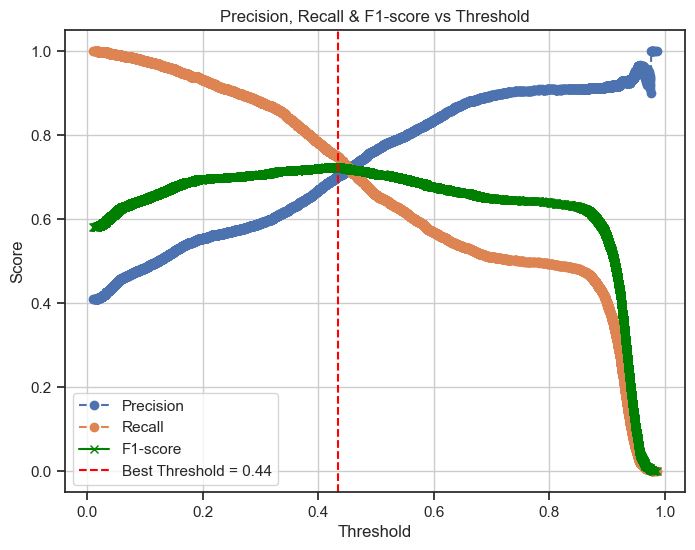

Best Threshold: 0.44

Updated Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      6000
           1       0.70      0.75      0.73      4181

    accuracy                           0.77     10181
   macro avg       0.76      0.76      0.76     10181
weighted avg       0.77      0.77      0.77     10181

Updated Confusion Matrix:
 [[4686 1314]
 [1053 3128]]


In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

# Get predicted probabilities for the positive class
y_probs = gb_best_model.predict_proba(x_test_scaled)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Compute F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)  # Avoid division by zero

# Find the best threshold based on the highest F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

# Apply the new threshold
y_test_pred_adjusted = (y_probs >= best_threshold).astype(int)

# Plot Precision-Recall vs. Threshold Curve
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--', marker='o')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='--', marker='o')
plt.plot(thresholds, f1_scores[:-1], label='F1-score', linestyle='-', marker='x', color='green')
plt.axvline(best_threshold, color='red', linestyle='dashed', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall & F1-score vs Threshold")
plt.legend()
plt.grid()
plt.show()

# Evaluate results
print(f"Best Threshold: {best_threshold:.2f}\n")
print("Updated Classification Report:\n", classification_report(y_test, y_test_pred_adjusted))
print("Updated Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_adjusted))


In [146]:
print('Training :\n',classification_report(y_train_smote, y_train_pred_gb))

Training :
               precision    recall  f1-score   support

           0       0.77      0.87      0.82     24000
           1       0.85      0.74      0.79     24000

    accuracy                           0.81     48000
   macro avg       0.81      0.81      0.81     48000
weighted avg       0.81      0.81      0.81     48000



In [147]:
print('Testing :\n',classification_report(y_test, y_test_pred_gb))

Testing :
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      6000
           1       0.76      0.66      0.71      4181

    accuracy                           0.78     10181
   macro avg       0.77      0.76      0.76     10181
weighted avg       0.78      0.78      0.77     10181



In [148]:
print(confusion_matrix(y_test, y_test_pred_gb))

[[5152  848]
 [1428 2753]]


**4.GaussianNB**

In [153]:
gnb = GaussianNB()
gnb_param_grids = {
                  }

randomized_search_gnb = RandomizedSearchCV(
    estimator=gnb,
    param_distributions=gnb_param_grids,
    n_iter=10,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1)

randomized_search_gnb.fit(x_train_scaled, y_train_smote)

gnb_best_model = randomized_search_gnb.best_estimator_

y_train_pred_gnb = gnb_best_model.predict(x_train_scaled)
y_test_pred_gnb = gnb_best_model.predict(x_test_scaled)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [154]:
print('Training :\n',classification_report(y_train_smote, y_train_pred_gnb))

Training :
               precision    recall  f1-score   support

           0       0.75      0.75      0.75     24000
           1       0.75      0.75      0.75     24000

    accuracy                           0.75     48000
   macro avg       0.75      0.75      0.75     48000
weighted avg       0.75      0.75      0.75     48000



In [155]:
print('Testing :\n',classification_report(y_test, y_test_pred_gnb))

Testing :
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      6000
           1       0.69      0.75      0.72      4181

    accuracy                           0.76     10181
   macro avg       0.75      0.76      0.75     10181
weighted avg       0.76      0.76      0.76     10181



In [157]:
print(confusion_matrix(y_test, y_test_pred_gnb))

[[4574 1426]
 [1029 3152]]


**5.KNN**

In [158]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize model
knn = KNeighborsClassifier()

# Define hyperparameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Hyperparameter tuning
randomized_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=knn_param_grid,
    n_iter=10,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
randomized_search_knn.fit(x_train_scaled, y_train_smote)

# Get best model
knn_best_model = randomized_search_knn.best_estimator_

y_train_pred_knn = knn_best_model.predict(x_train_scaled)
y_test_pred_knn = knn_best_model.predict(x_test_scaled)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [159]:
print('Training :\n',classification_report(y_train_smote, y_train_pred_knn))

Training :
               precision    recall  f1-score   support

           0       0.78      0.83      0.80     24000
           1       0.82      0.76      0.79     24000

    accuracy                           0.80     48000
   macro avg       0.80      0.80      0.80     48000
weighted avg       0.80      0.80      0.80     48000



In [160]:
print('Testing :\n',classification_report(y_test, y_test_pred_knn))

Testing :
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      6000
           1       0.70      0.69      0.70      4181

    accuracy                           0.75     10181
   macro avg       0.75      0.74      0.74     10181
weighted avg       0.75      0.75      0.75     10181



In [161]:
print(confusion_matrix(y_test, y_test_pred_knn))

[[4773 1227]
 [1284 2897]]


**6.ADAboost**

In [162]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize AdaBoost classifier
abc = AdaBoostClassifier()

# Define hyperparameter grid (Removed 'algorithm')
abc_param_grids = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 1.5]
}

# Hyperparameter tuning with RandomizedSearchCV
randomized_search_abc = RandomizedSearchCV(
    estimator=abc,
    param_distributions=abc_param_grids,
    n_iter=10,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    error_score='raise'  # Raises errors instead of setting NaN scores
)

# Fit the model
randomized_search_abc.fit(x_train_scaled, y_train_smote)

# Get best model
abc_best_model = randomized_search_abc.best_estimator_

# Predictions
y_train_pred_ada = abc_best_model.predict(x_train_scaled)
y_test_pred_ada = abc_best_model.predict(x_test_scaled)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [163]:
print('Training :\n',classification_report(y_train_smote, y_train_pred_ada))

Training :
               precision    recall  f1-score   support

           0       0.74      0.85      0.79     24000
           1       0.82      0.70      0.75     24000

    accuracy                           0.77     48000
   macro avg       0.78      0.77      0.77     48000
weighted avg       0.78      0.77      0.77     48000



In [164]:
print('Testing :\n',classification_report(y_test, y_test_pred_ada))

Testing :
               precision    recall  f1-score   support

           0       0.79      0.86      0.82      6000
           1       0.76      0.67      0.71      4181

    accuracy                           0.78     10181
   macro avg       0.78      0.76      0.77     10181
weighted avg       0.78      0.78      0.78     10181



In [165]:
print(confusion_matrix(y_test, y_test_pred_ada))

[[5133  867]
 [1385 2796]]


**7.XGboost**

In [166]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

# Perform Randomized Search CV
randomized_search_xgb = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=xgb_param_grid,
    n_iter=10,  # Number of random combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model on resampled training data
randomized_search_xgb.fit(x_train_scaled, y_train_smote)

# Best model after hyperparameter tuning
xgb_best_model = randomized_search_xgb.best_estimator_

# Predictions
y_train_pred_xgb = xgb_best_model.predict(x_train_scaled)
y_test_pred_xgb = xgb_best_model.predict(x_test_scaled)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\karth\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [167]:
print('Training :\n',classification_report(y_train_smote, y_train_pred_xgb))

Training :
               precision    recall  f1-score   support

           0       0.76      0.86      0.81     24000
           1       0.84      0.74      0.78     24000

    accuracy                           0.80     48000
   macro avg       0.80      0.80      0.80     48000
weighted avg       0.80      0.80      0.80     48000



In [168]:
print('Testing :\n',classification_report(y_test, y_test_pred_xgb))

Testing :
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      6000
           1       0.76      0.68      0.72      4181

    accuracy                           0.78     10181
   macro avg       0.78      0.77      0.77     10181
weighted avg       0.78      0.78      0.78     10181



In [169]:
print(confusion_matrix(y_test, y_test_pred_xgb))

[[5095  905]
 [1333 2848]]


In [193]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import numpy as np

# Get probability scores
y_probs = xgb_best_model.predict_proba(x_test_scaled)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Find the best threshold using F1-score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)  # Avoid division by zero
best_threshold = thresholds[np.argmax(f1_scores)]  # Select threshold that maximizes F1-score

# Apply new threshold
y_test_pred_adjusted = (y_probs >= best_threshold).astype(int)

# Evaluate
print("Testing Results After Threshold Adjustment:")
print(classification_report(y_test, y_test_pred_adjusted))
print(confusion_matrix(y_test, y_test_pred_adjusted))


Testing Results After Threshold Adjustment:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      6000
           1       0.72      0.74      0.73      4181

    accuracy                           0.77     10181
   macro avg       0.77      0.77      0.77     10181
weighted avg       0.77      0.77      0.77     10181

[[4767 1233]
 [1082 3099]]


In [195]:
import pickle


In [197]:
pickle.dump(xgb_best_model, open('xgb_best_model.sav', 'wb'))


In [199]:
pickle.dump(scaler, open('scaler.sav', 'wb'))

In [201]:
pickle.dump(had_angina_label, open('had_angina_label.sav', 'wb'))  # Label encoded


In [203]:
pickle.dump(age_category_ohe, open('age_category_ohe.sav', 'wb'))  # One-hot encoder


In [205]:
pickle.dump(had_diabetes_ohe, open('had_diabetes_ohe.sav', 'wb'))  # One-hot encoder


In [207]:

pickle.dump(sex_label, open('sex_label.sav', 'wb'))  # Label encoded

In [209]:
pickle.dump(had_arthritis_label, open('had_arthritis_label.sav', 'wb'))  # Label encoded

In [211]:
x_train_scaled.columns

Index(['BMI', 'HadAngina', 'AgeCategory_Old', 'SleepHours',
       'PhysicalHealthDays', 'MentalHealthDays', 'AgeCategory_Young',
       'GeneralHealth_Fair', 'GeneralHealth_Very good', 'HadArthritis'],
      dtype='object')

In [213]:
x_train_scaled.head()

,BMI,HadAngina,AgeCategory_Old,SleepHours,PhysicalHealthDays,MentalHealthDays,AgeCategory_Young,GeneralHealth_Fair,GeneralHealth_Very good,HadArthritis
0,2.183119,-0.580718,0.804802,-1.898210,2.223955,-0.532713,-0.399998,-0.506881,-0.599495,1.129154
1,-0.138844,-0.580718,0.804802,0.568296,-0.529822,-0.532713,-0.399998,-0.506881,1.689026,1.129154
2,-0.138844,1.722006,0.804802,0.568296,-0.434864,-0.083513,-0.399998,2.022529,-0.599495,1.129154
3,-1.890026,-0.580718,-1.263463,-0.048331,-0.624780,-0.532713,-0.399998,-0.506881,1.689026,-0.885619
4,0.620767,1.722006,-1.263463,-1.898210,-0.244948,1.151787,-0.399998,-0.506881,-0.599495,1.129154


In [215]:
pip list


Package                           Version
--------------------------------- -------------------
absl-py                           2.1.0
aext-assistant                    4.1.0
aext-assistant-server             4.1.0
aext-core                         4.1.0
aext-core-server                  4.1.0
aext-panels                       4.1.0
aext-panels-server                4.1.0
aext-project-filebrowser-server   4.1.0
aext-share-notebook               4.1.0
aext-share-notebook-server        4.1.0
aext-shared                       4.1.0
aext-toolbox                      4.1.0
aiobotocore                       2.19.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.13.3
altair                            5.0.1
anaconda-anon-usage               0.5.0
anaconda-catalogs                 0.2.0
anaconda-cli-base  

In [217]:
scaler.feature_names_in_


array(['BMI', 'HadAngina', 'AgeCategory_Old', 'SleepHours',
       'PhysicalHealthDays', 'MentalHealthDays', 'AgeCategory_Young',
       'GeneralHealth_Fair', 'GeneralHealth_Very good', 'HadArthritis'],
      dtype=object)

In [219]:
!python --version


Python 3.12.3
